In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("features_30_sec.csv")

In [3]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [4]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
dt = df.drop(['length', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'], axis = 1)


In [6]:
dt.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,label
0,blues.00000.wav,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,blues
1,blues.00001.wav,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,blues
2,blues.00002.wav,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,blues
3,blues.00003.wav,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,blues
4,blues.00004.wav,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,blues


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   chroma_stft_mean         1000 non-null   float64
 2   chroma_stft_var          1000 non-null   float64
 3   rms_mean                 1000 non-null   float64
 4   rms_var                  1000 non-null   float64
 5   spectral_centroid_mean   1000 non-null   float64
 6   spectral_centroid_var    1000 non-null   float64
 7   spectral_bandwidth_mean  1000 non-null   float64
 8   spectral_bandwidth_var   1000 non-null   float64
 9   rolloff_mean             1000 non-null   float64
 10  rolloff_var              1000 non-null   float64
 11  zero_crossing_rate_mean  1000 non-null   float64
 12  zero_crossing_rate_var   1000 non-null   float64
 13  harmony_mean             1000 non-null   float64
 14  harmony_var              

In [8]:
dt.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,1.844345e+06,0.103612,0.002986,-3.659332e-04,0.012540,-0.000395,5.670073e-03,119.505363
std,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,1.425085e+06,0.041821,0.003024,1.683946e-03,0.011653,0.001082,6.500325e-03,28.264176
min,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,1.468612e+04,0.021697,0.000044,-2.606458e-02,0.000049,-0.007150,8.299008e-07,54.978391
25%,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,7.727312e+05,0.070244,0.001079,-1.041584e-04,0.004383,-0.000537,1.292592e-03,99.384014
50%,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,1.476115e+06,0.099503,0.002022,-3.176783e-06,0.008768,-0.000036,3.410864e-03,117.453835
75%,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,2.555262e+06,0.131944,0.003628,6.643430e-07,0.016947,-0.000004,7.641643e-03,135.999178
max,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,8.660900e+06,0.274631,0.028718,1.505448e-02,0.085658,0.005787,4.744598e-02,234.907670


In [9]:
dt.corr()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo
chroma_stft_mean,1.000000,-0.461729,0.499926,0.261544,0.615728,0.285926,0.517710,0.041088,0.598122,0.117139,0.554771,0.355920,0.031963,0.281150,-0.116567,0.465995,0.018477
chroma_stft_var,-0.461729,1.000000,-0.078777,0.290138,-0.246441,0.305819,-0.036896,0.346907,-0.168721,0.383134,-0.470186,0.169289,-0.006378,0.047447,0.086584,0.020981,-0.079209
rms_mean,0.499926,-0.078777,1.000000,0.607399,0.510154,0.324077,0.530017,0.099830,0.537902,0.200083,0.332163,0.319304,0.064440,0.893898,-0.009166,0.789994,-0.052634
rms_var,0.261544,0.290138,0.607399,1.000000,0.347831,0.583353,0.402333,0.320793,0.368570,0.417880,0.156530,0.568643,0.084849,0.585318,0.123557,0.789910,-0.118671
spectral_centroid_mean,0.615728,-0.246441,0.510154,0.347831,1.000000,0.520548,0.904435,0.011256,0.979637,0.198031,0.874749,0.671771,0.053695,0.316211,-0.013444,0.559647,-0.025764
spectral_centroid_var,0.285926,0.305819,0.324077,0.583353,0.520548,1.000000,0.622834,0.636494,0.545128,0.815550,0.252065,0.844141,0.068491,0.276994,0.133146,0.485951,-0.100085
spectral_bandwidth_mean,0.517710,-0.036896,0.530017,0.402333,0.904435,0.622834,1.000000,0.220159,0.956189,0.438581,0.612308,0.630223,0.066762,0.387852,0.016082,0.532754,-0.049180
spectral_bandwidth_var,0.041088,0.346907,0.099830,0.320793,0.011256,0.636494,0.220159,1.000000,0.053632,0.884877,-0.206162,0.260887,0.033834,0.121498,0.078850,0.159899,-0.061403
rolloff_mean,0.598122,-0.168721,0.537902,0.368570,0.979637,0.545128,0.956189,0.053632,1.000000,0.261685,0.779823,0.652041,0.054158,0.356427,-0.017863,0.560311,-0.031534
rolloff_var,0.117139,0.383134,0.200083,0.417880,0.198031,0.815550,0.438581,0.884877,0.261685,1.000000,-0.091676,0.457930,0.054429,0.200699,0.105675,0.266366,-0.077867


In [10]:
dt.isnull().sum()

filename                   0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
label                      0
dtype: int64

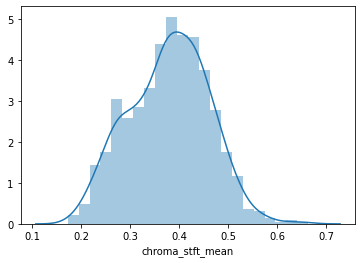

In [11]:
sns.distplot(dt.chroma_stft_mean)

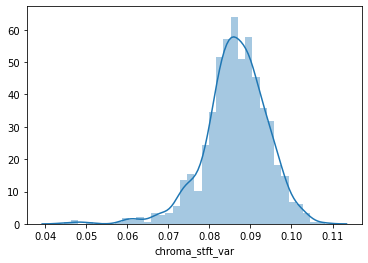

In [12]:
sns.distplot(dt.chroma_stft_var)

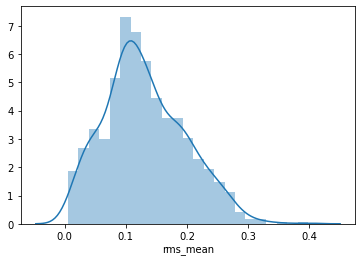

In [13]:
sns.distplot(dt.rms_mean)

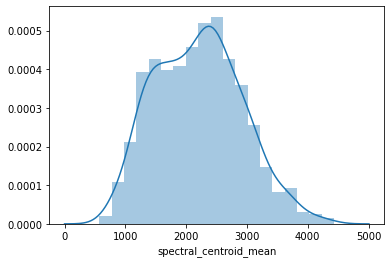

In [14]:
sns.distplot(dt.spectral_centroid_mean)

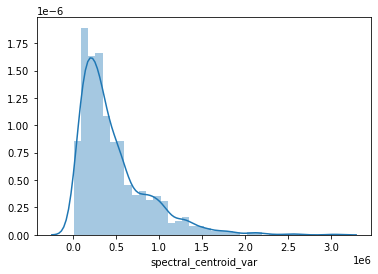

In [15]:
sns.distplot(dt.spectral_centroid_var)

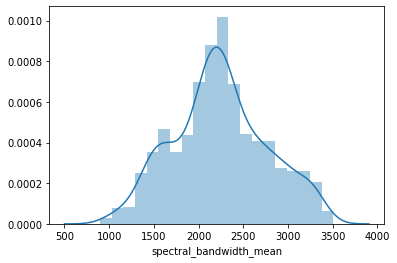

In [16]:
sns.distplot(dt.spectral_bandwidth_mean)

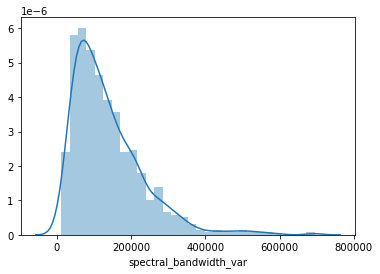

In [17]:
sns.distplot(dt.spectral_bandwidth_var)

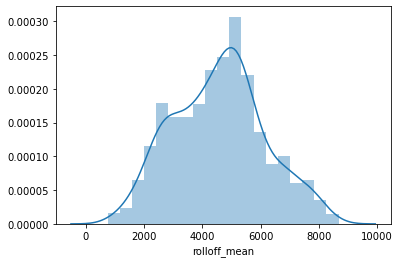

In [18]:
sns.distplot(dt.rolloff_mean)

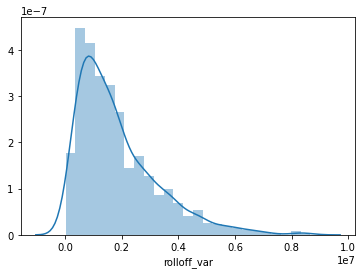

In [19]:
sns.distplot(dt.rolloff_var)

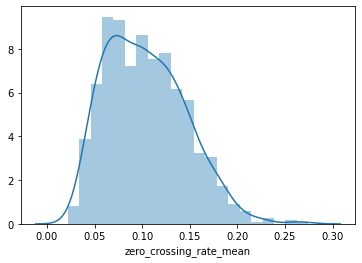

In [20]:
sns.distplot(dt.zero_crossing_rate_mean)

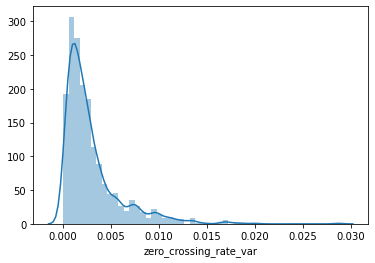

In [21]:
sns.distplot(dt.zero_crossing_rate_var)

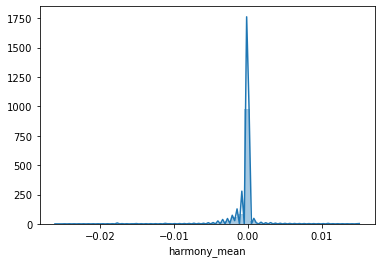

In [22]:
sns.distplot(dt.harmony_mean)

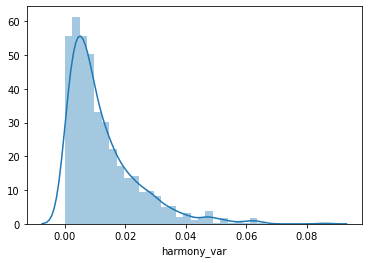

In [23]:
sns.distplot(dt.harmony_var)

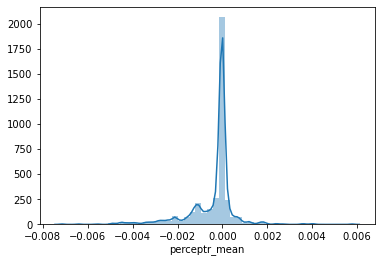

In [24]:
sns.distplot(dt.perceptr_mean)

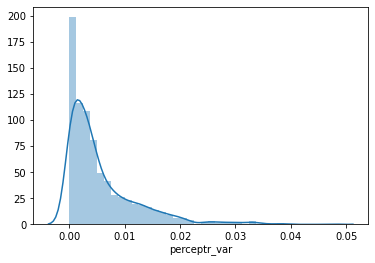

In [25]:
sns.distplot(dt.perceptr_var)

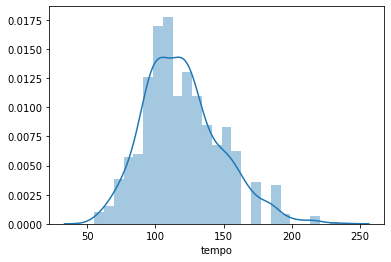

In [26]:
sns.distplot(dt.tempo)

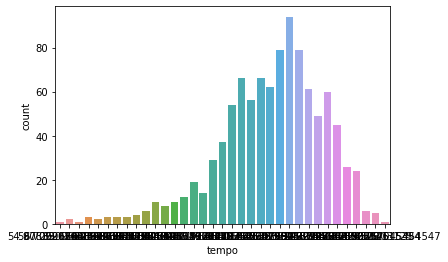

In [27]:
sns.countplot(dt.tempo)

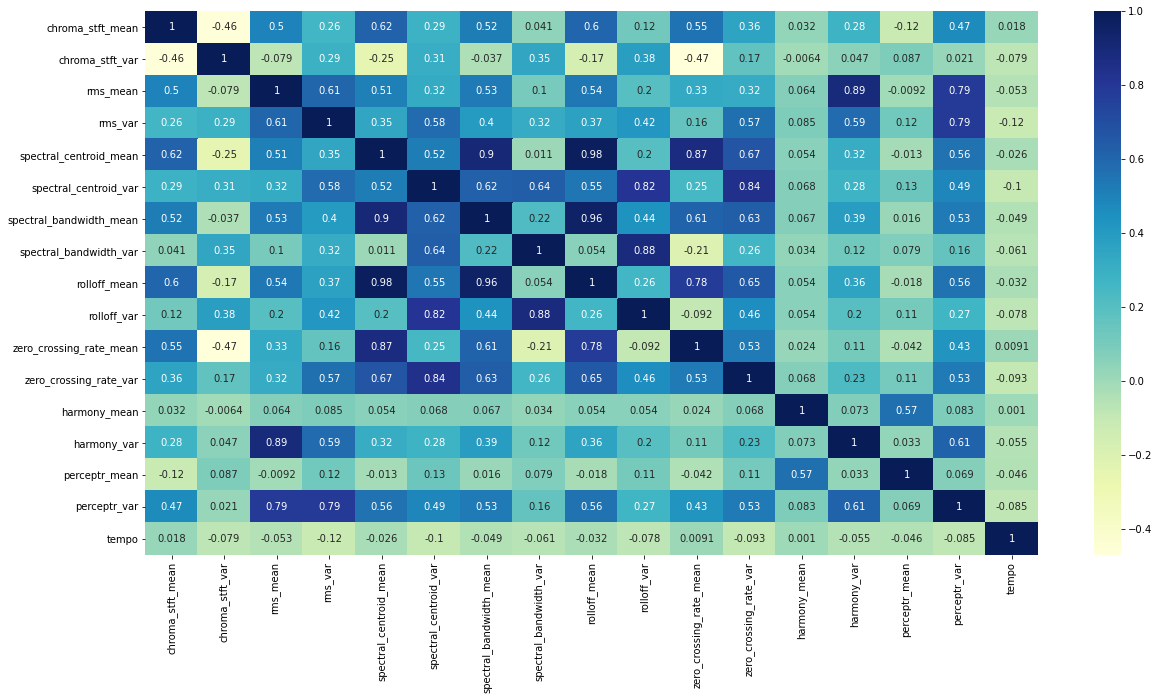

In [28]:
plt.figure(figsize=(20,10))
c = dt.corr()
sns.heatmap(c,cmap = "YlGnBu",annot = True)

In [29]:
#sns.pairplot(dt)

In [30]:
x=dt[['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var' ,'spectral_centroid_mean' ,'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo']]
y=dt['label'].values

In [31]:
'''from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var' ,'spectral_centroid_mean' ,'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    dt[column] = scaler.fit_transform(dt[column].values.reshape(-1, 1))
    
dt.head()'''

"from sklearn.preprocessing import MinMaxScaler\ncolumns_to_scale = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var' ,'spectral_centroid_mean' ,'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo']\n\nfor column in columns_to_scale:\n    scaler = MinMaxScaler()\n    dt[column] = scaler.fit_transform(dt[column].values.reshape(-1, 1))\n    \ndt.head()"

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)


In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(700, 17) (300, 17) (700,) (300,)


In [34]:
class_names = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [35]:
from sklearn.linear_model import LogisticRegression



In [36]:
model = LogisticRegression(max_iter=10000)


In [37]:
import sklearn
sklearn.preprocessing.scale(x_train, axis=0, with_mean=True, with_std=True, copy=True)

array([[-1.32249041, -0.52380022, -1.30332688, ...,  0.25879485,
        -0.86045588,  0.84113308],
       [-1.0595198 , -0.47640812, -0.40080052, ...,  0.09027026,
        -0.45947925,  1.46868288],
       [ 0.63758284,  0.65812527,  0.37910087, ...,  0.43859907,
         1.35273788, -0.56457845],
       ...,
       [ 0.80551285, -0.9202086 , -0.6132375 , ...,  0.32047369,
        -0.5557226 ,  0.12393332],
       [-0.73164839,  2.01763794,  0.79524616, ..., -0.80561275,
        -0.61416695, -0.4139665 ],
       [ 1.29440253, -1.08108764,  1.51012892, ...,  0.1144928 ,
         1.57795802,  1.13645063]])

In [38]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [39]:
y_predict=model.predict(x_test)

In [40]:
print(y_predict)

['classical' 'pop' 'country' 'disco' 'metal' 'jazz' 'classical' 'country'
 'metal' 'reggae' 'classical' 'country' 'reggae' 'disco' 'jazz' 'metal'
 'classical' 'classical' 'classical' 'jazz' 'jazz' 'jazz' 'disco' 'disco'
 'reggae' 'pop' 'jazz' 'classical' 'pop' 'jazz' 'pop' 'reggae' 'metal'
 'pop' 'pop' 'pop' 'disco' 'disco' 'disco' 'country' 'jazz' 'jazz' 'metal'
 'disco' 'country' 'rock' 'reggae' 'classical' 'rock' 'jazz' 'disco'
 'country' 'disco' 'reggae' 'reggae' 'pop' 'jazz' 'jazz' 'metal' 'reggae'
 'classical' 'metal' 'classical' 'pop' 'metal' 'metal' 'jazz' 'classical'
 'jazz' 'classical' 'pop' 'disco' 'jazz' 'jazz' 'disco' 'jazz' 'rock'
 'pop' 'metal' 'metal' 'country' 'disco' 'rock' 'metal' 'country' 'metal'
 'reggae' 'country' 'disco' 'country' 'pop' 'jazz' 'disco' 'classical'
 'metal' 'metal' 'jazz' 'classical' 'metal' 'metal' 'reggae' 'country'
 'metal' 'country' 'reggae' 'metal' 'metal' 'pop' 'reggae' 'pop' 'country'
 'disco' 'reggae' 'jazz' 'jazz' 'pop' 'classical' 'hipho

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

Logistic Regression Results: 
Training Accuracy: 0.41
Testing Accuracy: 0.37
Precision: 0.32
Recall: 0.37


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

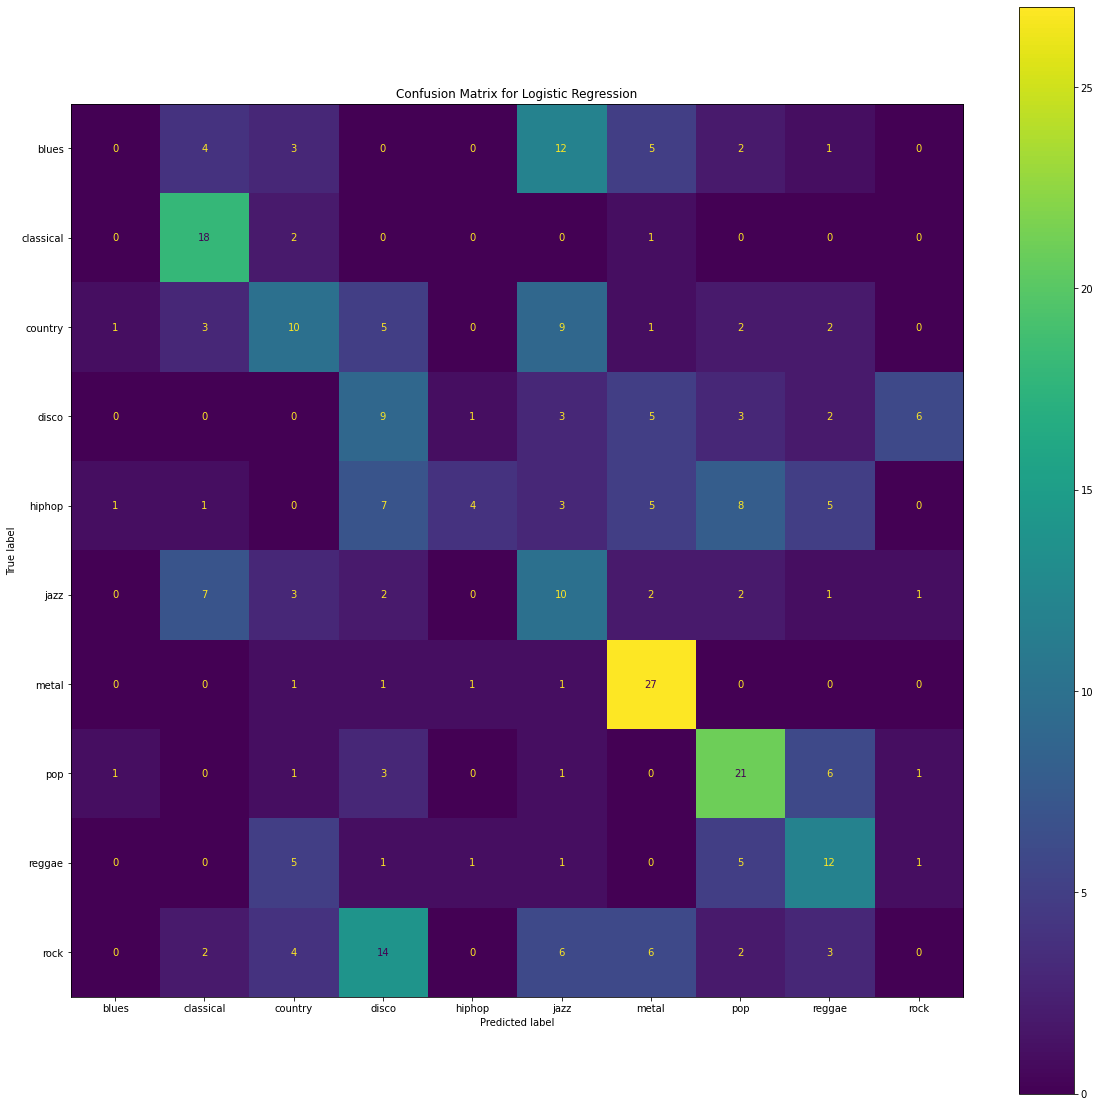

In [42]:
print('Logistic Regression Results: ')

train_score = model.score(x_train,y_train)
print('Training Accuracy:', train_score.round(2))
test_score = model.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2))

precision_logi = precision_score(y_test, y_predict, average='weighted', labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_predict, average='weighted').round(2)
print('Recall:', recall_logi)

fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model, x_test, y_test, display_labels=class_names, ax=ax)
plt.title('Confusion Matrix for Logistic Regression')

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
r_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
r_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300, n_jobs=-1)

Random Forest Classifier Results: 
Training Accuracy: 0.91
Testing Accuracy: 0.6
Precision: 0.62
Recall: 0.6


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

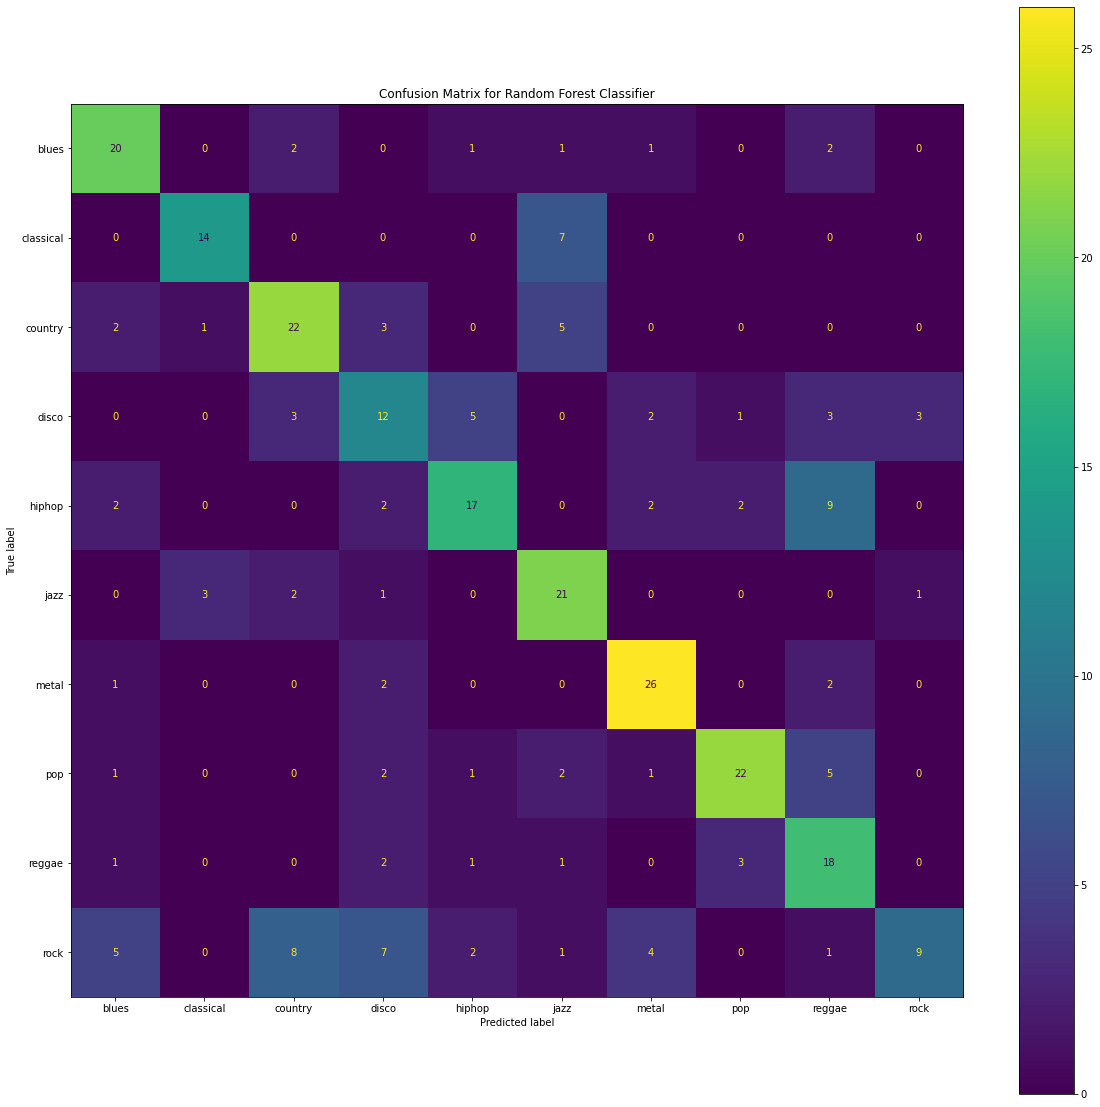

In [45]:
print('Random Forest Classifier Results: ')

train_score = r_clf.score(x_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = r_clf.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_predict = r_clf.predict(x_test)

precision_r = precision_score(y_test, y_predict, average='weighted', labels=class_names).round(2)
print('Precision:', precision_r)
recall_r = recall_score(y_test, y_predict, average='weighted').round(2)
print('Recall:', recall_r)

fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(r_clf, x_test, y_test, display_labels=class_names, ax=ax)
plt.title('Confusion Matrix for Random Forest Classifier')


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier()

In [48]:
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

Descision Tree: 
Training Accuracy: 1.0
Testing Accuracy: 0.46
Precision: 0.47
Recall: 0.46


Text(0.5, 1.0, 'Confusion Matrix for Descision Tree:')

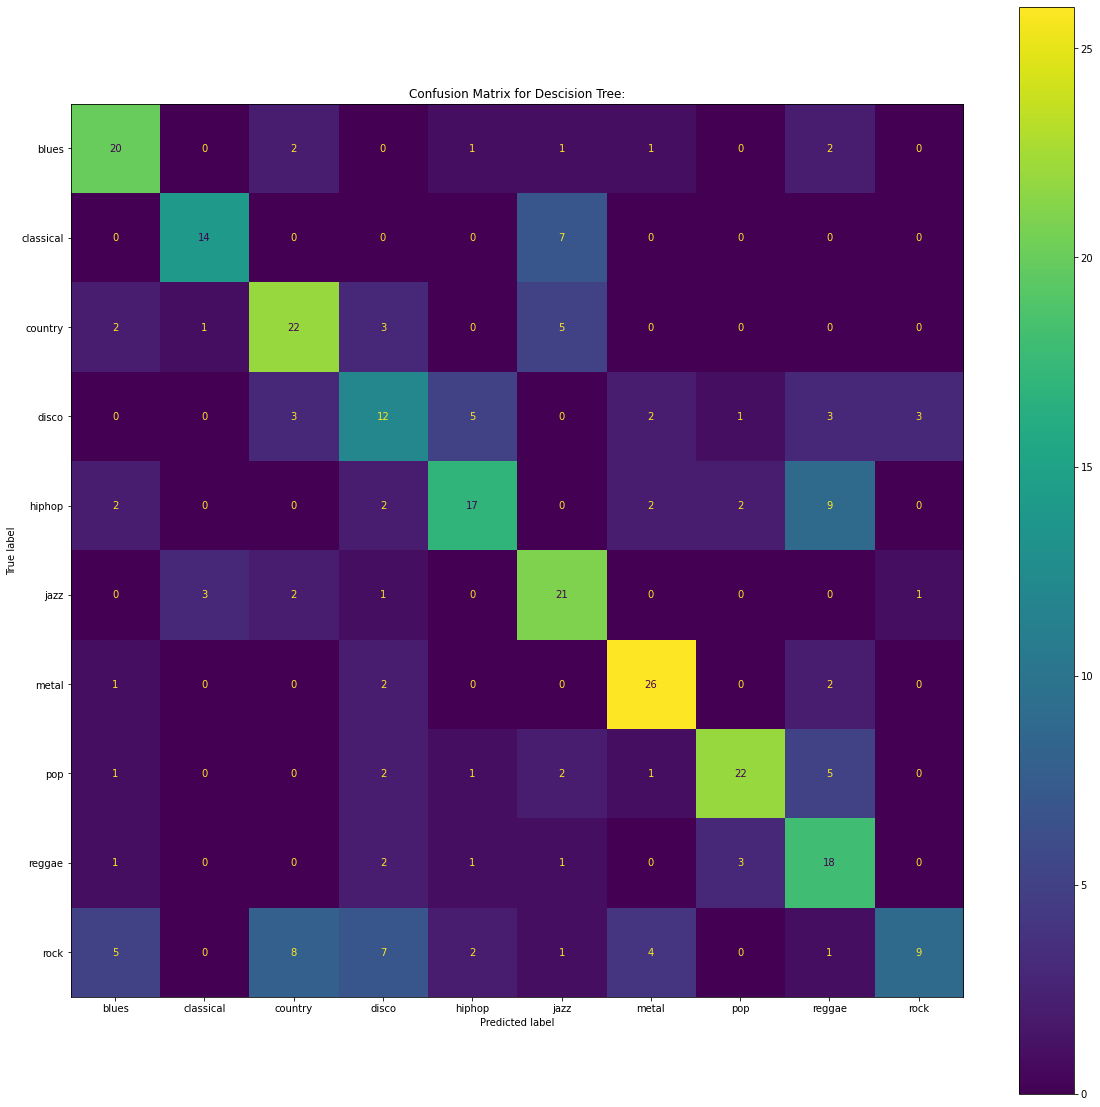

In [49]:
print('Descision Tree: ')

train_score = clf.score(x_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = clf.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_predict = clf.predict(x_test)

precision_r = precision_score(y_test, y_predict, average='weighted', labels=class_names).round(2)
print('Precision:', precision_r)
recall_r = recall_score(y_test, y_predict, average='weighted').round(2)
print('Recall:', recall_r)

fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(r_clf, x_test, y_test, display_labels=class_names, ax=ax)
plt.title('Confusion Matrix for Descision Tree:')


In [51]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  